# CIND820 Analytics Project
# Controlling a Pandemic: Analyzing Key Factors in COVID-19 Outcomes by Country
Dataset: Our world in COVID-19

In [98]:
%matplotlib inline
import pandas as pd
import numpy as np

#Visualization
#!pip install plotly_express
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling and evaluation
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [99]:
OWIDdf = pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv')

In [100]:
OWIDdf.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [101]:
OWIDdf.describe()
#many nonsensical negative values like -min in new_deaths columns.

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.471400e+04,74712.000000,73711.000000,6.543500e+04,65593.000000,73711.000000,74307.000000,74305.000000,73309.000000,65041.000000,...,69164.000000,47192.000000,69780.000000,70684.000000,54831.000000,54025.000000,35017.000000,63842.000000,72220.000000,69723.000000
mean,6.725121e+05,5210.714236,5214.023657,1.975604e+04,132.513378,116.636923,8007.450972,67.873103,67.623678,186.987404,...,19137.814768,13.285345,257.219626,7.799686,10.539596,32.651834,50.989759,3.034195,73.149390,0.727762
std,4.715612e+06,32436.127215,32089.206467,1.158250e+05,724.644150,661.843493,15711.030034,169.786160,142.948758,331.982603,...,19739.319173,19.919841,118.557217,3.944498,10.406410,13.467667,31.767167,2.466407,7.550093,0.150096
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,7.360000e+02,2.000000,6.000000,3.900000e+01,0.000000,0.000000,155.318500,0.146000,1.022000,5.773000,...,4466.507000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.880000,0.602000
50%,8.348500e+03,61.000000,73.571000,2.590000e+02,2.000000,1.000000,1111.910000,6.566000,8.713000,32.237000,...,12951.839000,2.000000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.748000
75%,8.994800e+04,684.000000,708.714000,2.463000e+03,16.000000,12.429000,7485.191000,58.559000,65.683000,199.251000,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,4.000000,78.730000,0.848000
max,1.223157e+08,880902.000000,739564.429000,2.701445e+06,17895.000000,14424.000000,147945.383000,8652.658000,2648.773000,2327.774000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


In [102]:
OWIDdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76008 entries, 0 to 76007
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               76008 non-null  object 
 1   continent                              72275 non-null  object 
 2   location                               76008 non-null  object 
 3   date                                   76008 non-null  object 
 4   total_cases                            74714 non-null  float64
 5   new_cases                              74712 non-null  float64
 6   new_cases_smoothed                     73711 non-null  float64
 7   total_deaths                           65435 non-null  float64
 8   new_deaths                             65593 non-null  float64
 9   new_deaths_smoothed                    73711 non-null  float64
 10  total_cases_per_million                74307 non-null  float64
 11  ne

# Data Preprocessing

In [103]:
#The location column contains continent and country values, but we are only interested in countries
OWIDdf = OWIDdf[-OWIDdf.location.isin(['World', 'South America','North America','Asia','Africa','Europe','Australiasia','Antarctica','European Union'])]

In [104]:
#Removing redundant columns
#some columns are removed due to multicollinearity
OWIDdf = OWIDdf.drop(columns=['total_cases','total_tests','aged_65_older','aged_70_older','iso_code','continent'])

In [105]:
###new_ features removed as they will correlate with total_ columns

OWIDdf = OWIDdf[OWIDdf.columns.difference(OWIDdf.filter(like='new').columns,sort=False)]

In [106]:
OWIDdf.isnull().sum()

location                                   0
date                                       0
total_deaths                           10450
total_cases_per_million                 1697
total_deaths_per_million               10844
reproduction_rate                      12406
icu_patients                           65172
icu_patients_per_million               65172
hosp_patients                          63552
hosp_patients_per_million              63552
weekly_icu_admissions                  72405
weekly_icu_admissions_per_million      72405
weekly_hosp_admissions                 71878
weekly_hosp_admissions_per_million     71878
total_tests_per_thousand               38738
positive_rate                          34838
tests_per_case                         35449
tests_units                            32182
total_vaccinations                     68803
people_vaccinated                      69302
people_fully_vaccinated                70627
total_vaccinations_per_hundred         68803
people_vac

In [107]:
###Removing columns where na is more than 50000

OWIDdf = OWIDdf.loc[:, OWIDdf.isna().sum() < 50000]

In [108]:
OWIDdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73102 entries, 0 to 76007
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    73102 non-null  object 
 1   date                        73102 non-null  object 
 2   total_deaths                62652 non-null  float64
 3   total_cases_per_million     71405 non-null  float64
 4   total_deaths_per_million    62258 non-null  float64
 5   reproduction_rate           60696 non-null  float64
 6   total_tests_per_thousand    34364 non-null  float64
 7   positive_rate               38264 non-null  float64
 8   tests_per_case              37653 non-null  float64
 9   tests_units                 40920 non-null  object 
 10  stringency_index            64869 non-null  float64
 11  population                  72686 non-null  float64
 12  population_density          70522 non-null  float64
 13  median_age                  685

In [109]:
#removing other time-related variables
OWIDdf = OWIDdf.drop(columns=['positive_rate','tests_units','tests_per_case'])

In [110]:
OWIDdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73102 entries, 0 to 76007
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    73102 non-null  object 
 1   date                        73102 non-null  object 
 2   total_deaths                62652 non-null  float64
 3   total_cases_per_million     71405 non-null  float64
 4   total_deaths_per_million    62258 non-null  float64
 5   reproduction_rate           60696 non-null  float64
 6   total_tests_per_thousand    34364 non-null  float64
 7   stringency_index            64869 non-null  float64
 8   population                  72686 non-null  float64
 9   population_density          70522 non-null  float64
 10  median_age                  68502 non-null  float64
 11  gdp_per_capita              68741 non-null  float64
 12  extreme_poverty             46769 non-null  float64
 13  cardiovasc_death_rate       693

In [111]:
odft = OWIDdf[OWIDdf['total_tests_per_thousand'].notna()]

In [112]:
odft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34364 entries, 791 to 76006
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    34364 non-null  object 
 1   date                        34364 non-null  object 
 2   total_deaths                32387 non-null  float64
 3   total_cases_per_million     34032 non-null  float64
 4   total_deaths_per_million    32387 non-null  float64
 5   reproduction_rate           32131 non-null  float64
 6   total_tests_per_thousand    34364 non-null  float64
 7   stringency_index            33145 non-null  float64
 8   population                  34364 non-null  float64
 9   population_density          33838 non-null  float64
 10  median_age                  34350 non-null  float64
 11  gdp_per_capita              33562 non-null  float64
 12  extreme_poverty             26880 non-null  float64
 13  cardiovasc_death_rate       3

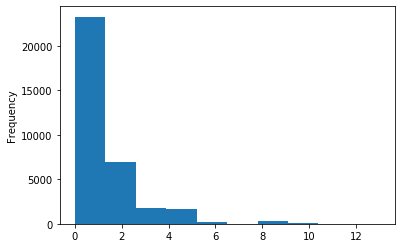

In [113]:
odft.isnull().sum(axis = 1).plot(kind='hist')

In [114]:
#Remove rows with 5+ NAs
odft = odft[odft.isnull().sum(axis=1) < 5]

In [115]:
#Removing NA from dependent variables

odft = odft[odft['total_cases_per_million'].notna()]
odft = odft[odft['total_deaths_per_million'].notna()]
odft = odft[odft['reproduction_rate'].notna()]

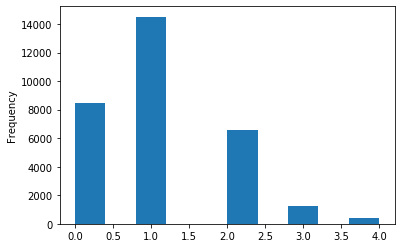

In [116]:
odft.isnull().sum(axis = 1).plot(kind='hist')

In [117]:
odft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31154 entries, 820 to 76005
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    31154 non-null  object 
 1   date                        31154 non-null  object 
 2   total_deaths                31154 non-null  float64
 3   total_cases_per_million     31154 non-null  float64
 4   total_deaths_per_million    31154 non-null  float64
 5   reproduction_rate           31154 non-null  float64
 6   total_tests_per_thousand    31154 non-null  float64
 7   stringency_index            30035 non-null  float64
 8   population                  31154 non-null  float64
 9   population_density          31154 non-null  float64
 10  median_age                  31154 non-null  float64
 11  gdp_per_capita              30800 non-null  float64
 12  extreme_poverty             24509 non-null  float64
 13  cardiovasc_death_rate       3

# Imbalanced Target Data 

Much of the target variables have sparse data or are heavily imbalanced and must be further processed to yield more realistic results. 
The data will be bucketized later to solve this problem.

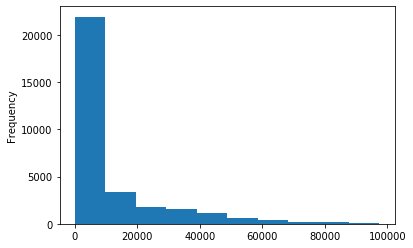

In [118]:
#Total_cases_per_million
#Imbalanced data?
odft.total_cases_per_million.plot(kind='hist')

In [126]:
odft[odft.total_cases_per_million < 10000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22041 entries, 820 to 76005
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    22041 non-null  object 
 1   date                        22041 non-null  object 
 2   total_deaths                22041 non-null  float64
 3   total_cases_per_million     22041 non-null  float64
 4   total_deaths_per_million    22041 non-null  float64
 5   reproduction_rate           22041 non-null  float64
 6   total_tests_per_thousand    22041 non-null  float64
 7   stringency_index            21588 non-null  float64
 8   population                  22041 non-null  float64
 9   population_density          22041 non-null  float64
 10  median_age                  22041 non-null  float64
 11  gdp_per_capita              21687 non-null  float64
 12  extreme_poverty             17498 non-null  float64
 13  cardiovasc_death_rate       2

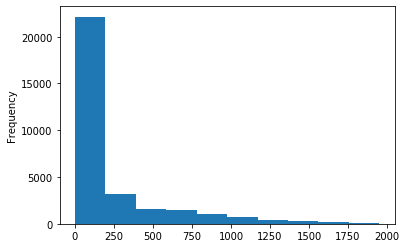

In [127]:
#total_deaths_per_million
#Imbalanced
odft.total_deaths_per_million.plot(kind='hist')

NameError: name 'odf' is not defined

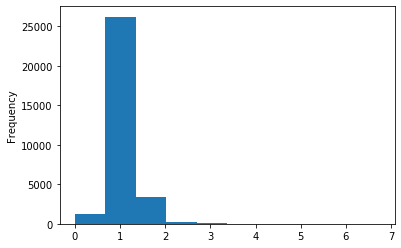

In [128]:
#Looking at the distribution of reproduction_rate
odft.reproduction_rate.plot(kind ='hist')
print(odf.reproduction_rate.max())

# Exploratory Data Analysis 

In [ ]:
odft.corr()

In [ ]:
hmp = sns.heatmap(odft.corr())
hmp.set_title('OWID COVID Correlation Heatmap')

In [ ]:
dhmp = sns.heatmap(odft.corr()[['total_cases_per_million']].sort_values(by='total_cases_per_million', ascending=False), annot=True, cmap='BrBG')
dhmp.set_title('Features correlating with total_cases')

In [ ]:
dhmp = sns.heatmap(odft.corr()[['total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False), annot=True, cmap='BrBG')
dhmp.set_title('Features correlating with total_deaths')

In [ ]:
nowiddfn = odf.select_dtypes(include='float64')
#ppdf = sns.pairplot(nowiddfn.sample(1000))
#ppdf.savefig("pairplotowid.png")

Some of the target variables to consider: reproduction_rate, total_cases_per_million, total_deaths_per_million.
Normally we would also consider crude mortality rate or case-fatality rate as well. However, confirmed cases is often underreported AND undertested and as such may be harder to evaluate accurately. It is important to consider that the data being robust and accurate relies heavily on the nation's testing capacity. 

Remember that the reproduction rate (R) describes the trajectory of the virus. A value of R = 1 means the amount of new infections and new recoveries are equal; meaning the virus numbers will stagnate. A value of 6.74 means the number of infected is sharply increasing and may lead in a big spike of infections and deaths, depending on government mitigation strategy.

In [ ]:
print(OWIDdf.reproduction_rate.max())
odf[odf.reproduction_rate==OWIDdf.reproduction_rate.max()]

# Calculating Crude Mortality/Case-Fatality
- Crude Mortality and Case-Fatality are other metrics to see how each country mitigates COVID-19.

In [131]:
#Most recent data
odfdt = odft.copy()
odfdt['date'] = pd.to_datetime(odfdt['date'])
cutoff_date = pd.Timestamp('2021-02-01 00:00:00');

#Shortened dataset to only the most recent date to remove all time-related values
odfdt = odfdt[odfdt.date == cutoff_date]

In [132]:
#shortened dataset
odfdt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 1133 to 75961
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    92 non-null     object        
 1   date                        92 non-null     datetime64[ns]
 2   total_deaths                92 non-null     float64       
 3   total_cases_per_million     92 non-null     float64       
 4   total_deaths_per_million    92 non-null     float64       
 5   reproduction_rate           92 non-null     float64       
 6   total_tests_per_thousand    92 non-null     float64       
 7   stringency_index            89 non-null     float64       
 8   population                  92 non-null     float64       
 9   population_density          92 non-null     float64       
 10  median_age                  92 non-null     float64       
 11  gdp_per_capita              91 non-null     float64   

In [130]:
odft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31154 entries, 820 to 76005
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    31154 non-null  object 
 1   date                        31154 non-null  object 
 2   total_deaths                31154 non-null  float64
 3   total_cases_per_million     31154 non-null  float64
 4   total_deaths_per_million    31154 non-null  float64
 5   reproduction_rate           31154 non-null  float64
 6   total_tests_per_thousand    31154 non-null  float64
 7   stringency_index            30035 non-null  float64
 8   population                  31154 non-null  float64
 9   population_density          31154 non-null  float64
 10  median_age                  31154 non-null  float64
 11  gdp_per_capita              30800 non-null  float64
 12  extreme_poverty             24509 non-null  float64
 13  cardiovasc_death_rate       3

In [ ]:
#Calculating Crude Mortality (COVID deaths/population) and CaseFatality (COVID deaths/COVID cases)
SK_Covid_Crude_Mortality = (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].population)
SK_Covid_CaseFatality = (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].total_cases)

SK_Median_age = OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].median_age.iloc[0]
print(" South Korea Crude Mortality:",SK_Covid_Crude_Mortality.iloc[0],"%\n","South Korea Case-Fatality: ",SK_Covid_CaseFatality.iloc[0],"%\n", "Median Age:", SK_Median_age)

South Korea reported one of the largest spikes in the early stages of the pandemic, yet they are one of the countries with the lowest COVID-19 Mortality, which may be attributed to hospital bed capacity.

In [ ]:
ITA_Covid_Crude_Mortality = (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].population)
ITA_Covid_CaseFatality = (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].total_cases)

ITA_Median_age = OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].median_age.iloc[0]
print(" Italy Crude Mortality:",ITA_Covid_Crude_Mortality.iloc[0],"%\n","Italy Case-Fatality: ",ITA_Covid_CaseFatality.iloc[0],"%\n", "Median Age:", ITA_Median_age )

Italy may have suffered more loss due to their higher median age.


In [ ]:
US_Covid_Crude_Mortality = (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].population)
US_Covid_CaseFatality = (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].total_cases)

US_Median_age = OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].median_age.iloc[0]
print(" United States Crude Mortality:",US_Covid_Crude_Mortality.iloc[0],"%\n","United States Case-Fatality: ",US_Covid_CaseFatality.iloc[0],"%\n", "Median Age:", US_Median_age )

Crude Mortality or Case fatality may be used a generated target feature vs total_deaths_per_million. However, because case-fatality veracity and consistency is heavily dependent on testing capacity of the region, this feature will be discarded, and crude_mortality will be the focus.

In [122]:
odft['crude_mortality'] = (odft.total_deaths/odft.population)

In [123]:
odfdt['crude_mortality'] = (odfdt.total_deaths/odfdt.population)

AttributeError: 'DataFrame' object has no attribute 'total_deaths'

In [133]:
odfdt.crude_mortality.describe()

count    9.200000e+01
mean     4.927858e-04
std      5.069271e-04
min      6.100738e-07
25%      5.654889e-05
50%      2.787282e-04
75%      9.039486e-04
max      1.822666e-03
Name: crude_mortality, dtype: float64

In [134]:
odft.crude_mortality.describe()

count    3.115400e+04
mean     2.192118e-04
std      3.508146e-04
min      2.173906e-09
25%      9.637915e-06
50%      5.644496e-05
75%      2.452326e-04
max      1.950021e-03
Name: crude_mortality, dtype: float64

In [135]:
#if using crude_mortality, belgium actually performs the worst
odft[odft.crude_mortality == odft.crude_mortality.max()]

,location,date,total_deaths,total_cases_per_million,total_deaths_per_million,reproduction_rate,total_tests_per_thousand,stringency_index,population,population_density,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,crude_mortality
7472,Belgium,2021-03-17,22600.0,70592.675,1950.021,1.19,890.702,NaN,11589616.0,375.564,...,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.931,0.00195


In [136]:
odfdt.sort_values(by='crude_mortality', ascending = False).head(10)[['location', 'crude_mortality']]

,location,crude_mortality
7428,Belgium,0.001823
62084,Slovenia,0.001694
71995,United Kingdom,0.001573
34390,Italy,0.001469
9357,Bosnia and Herzegovina,0.001440
50721,North Macedonia,0.001376
72418,United States,0.001362
10853,Bulgaria,0.001316
30758,Hungary,0.001302
55431,Portugal,0.001251


In [137]:
odfdt.sort_values(by='crude_mortality', ascending = False).tail(10)[['location', 'crude_mortality']]

,location,crude_mortality
27131,Ghana,1.338785e-05
46868,Mozambique,1.234985e-05
69263,Togo,9.542518e-06
70783,Uganda,7.105223e-06
16623,Cote d'Ivoire,5.913958e-06
48793,New Zealand,5.184320e-06
61293,Singapore,4.956974e-06
8603,Bhutan,1.295988e-06
68519,Thailand,1.131806e-06
45699,Mongolia,6.100738e-07


Many African Countries did very well in response to the virus.

# Visualizations

Text(0.5, 1.0, 'Relative frequency graph of Total cases per million')

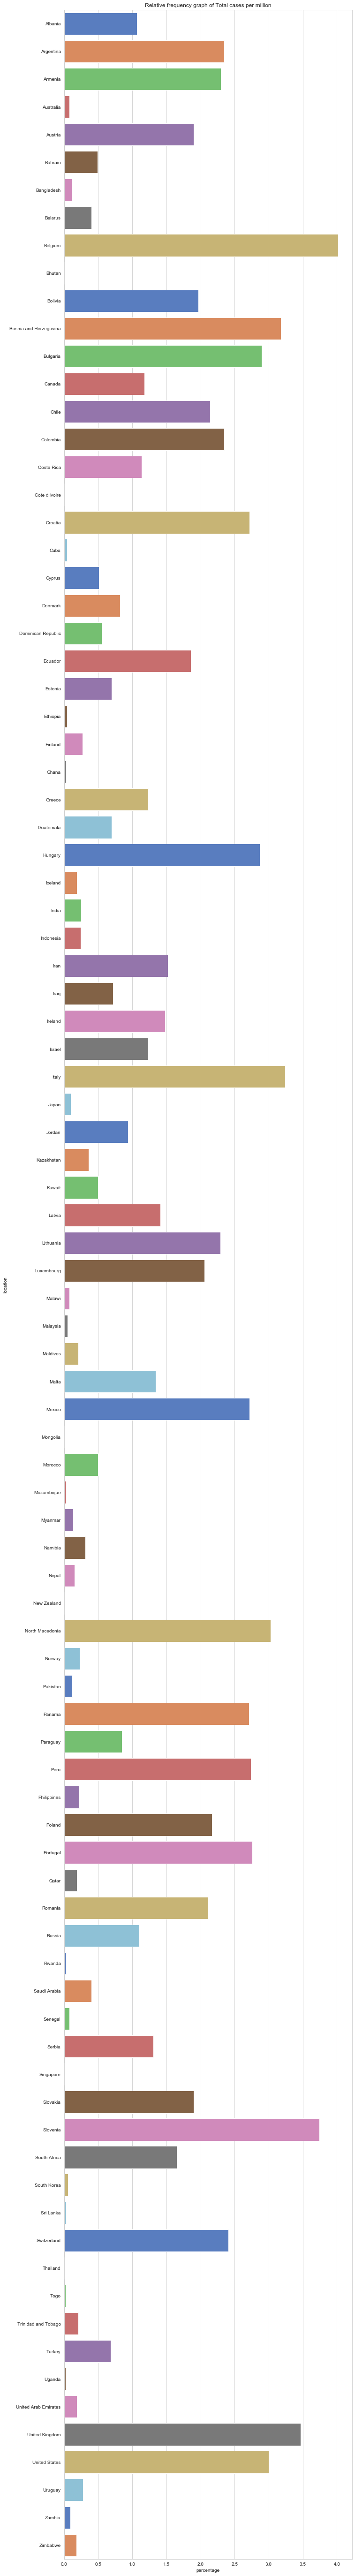

In [118]:
countries = odfdt.groupby('location')['crude_mortality'].sum()
countries_per = countries.groupby('location').agg(percentage =('crude_mortality', lambda p: p.sum() / countries.sum() * 100)).round(2)

sns.set_style("whitegrid")
bar, ax = plt.subplots(figsize=(11,100))
ax = sns.barplot(x="percentage",y=countries_per.index, data=countries_per, ci=None, palette='muted', orient = 'h')
ax.set_title("Relative frequency graph of crude mortality")

In [113]:
odfdt = odfdt[odfdt['total_cases_per_million'].notna()]
odfdt = odfdt[odfdt['population_density'].notna()]

In [116]:
px.scatter(odfdt,x='total_cases_per_million',y='population', size = 'population_density',
           color='location', hover_data=['location'],
           title='Population density vs total_cases_per_million')

if the population of the country is under 1 million, the value of total_cases_per_million is scaled up proportionally and may be inaccurate

In [126]:
px.scatter(odfdt,x='total_deaths_per_million',y='population', size = 'population_density',
           color='location', hover_data=['location'],
           title='Population density vs total_deaths_per_million')

Population density does not look like a large contributing factor to crude mortality rate, when looking at the higher total_deaths_per_million values.

In [130]:
px.scatter(odfdt,x='crude_mortality',y='population', size = 'population_density',
           color='location', hover_data=['location'],
           title='Population density and crude mortality')

In [142]:
px.scatter(odfdt,x='crude_mortality',y='diabetes_prevalence',
           color='location', hover_data=['location'],
           title='Diabetes prevalence and crude mortality')

In [135]:
odfdt_vis = odfdt[odfdt['handwashing_facilities'].notna()]

In [141]:
px.scatter(odfdt_vis,x='crude_mortality',y='handwashing_facilities',
           color='location', hover_data=['location'],
           title='Handwashing facilities and crude mortality')

The data shows that having more handwashing facilities doesn't necessarily indicate better COVID19 outcomes

In [143]:
px.scatter(odfdt,x='crude_mortality',y='median_age',
           color='location', hover_data=['location'],
           title='median age and crude mortality')

- Countries with higher median age are typically hit harder

# Bucketizing target variable crude_mortality for classification
- crude_mortality may be the best target variable as it is not susceptible to over-extrapolation like the total_deaths_per_million or total_cases_per_million variables when total population is much lower than a million.
- crude mortality is also not reliant on testing capacity as the metric does not take into account confirmed cases, only confirmed deaths which are readily available. Confirmed covid cases will vary in each region based on testing capacity

In [138]:
odft[odft.crude_mortality > 5.644496e-05].count() #50% of the target values to bucketize the output into 2 groups for classifying

location                      15577
date                          15577
total_deaths                  15577
total_cases_per_million       15577
total_deaths_per_million      15577
reproduction_rate             15577
total_tests_per_thousand      15577
stringency_index              14730
population                    15577
population_density            15577
median_age                    15577
gdp_per_capita                15577
extreme_poverty               12249
cardiovasc_death_rate         15577
diabetes_prevalence           15577
female_smokers                14230
male_smokers                  13922
handwashing_facilities         4721
hospital_beds_per_thousand    15255
life_expectancy               15577
human_development_index       15577
crude_mortality               15577
dtype: int64

In [149]:
#bucketized column
odft['outcomes'] = pd.cut(odft['crude_mortality'],[0,5.644496e-05,1],labels = [0,1])

In [166]:
odft.outcomes.value_counts()

1    15577
0    15577
Name: outcomes, dtype: int64

# Modeling 

# Random Forest Regressor

In [158]:
#Most recent data
odfdt = odft.copy()
odfdt['date'] = pd.to_datetime(odfdt['date'])
cutoff_date = pd.Timestamp('2021-02-01 00:00:00');

#Shortened dataset to only the most recent date to remove all time-related values
odfdt = odfdt[odfdt.date == cutoff_date]

In [253]:
y=odft.outcomes
X=odft[odft.columns.difference(['total_deaths_per_million','total_deaths','total_cases_per_million','date',
                              'tests_units','continent','reproduction_rate','crude_mortality','location','outcomes'])] 

In [254]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [255]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(train_X)
train_X = imp.transform(train_X)

valimp = SimpleImputer(missing_values=np.nan, strategy='median')
valimp = valimp.fit(val_X)
val_X = valimp.transform(val_X)
##train_y2 = train_y.fillna(train_y.median())

In [256]:
clf = RandomForestRegressor(n_estimators=100, bootstrap = True, random_state = 1)
clf = clf.fit(train_X, train_y)

In [257]:
print('R^2 training set: {:.2f} \nR^2 val set: {:.2f}'.format(clf.score(train_X, train_y),clf.score(val_X, val_y)))


R^2 training set: 1.00 
R^2 val set: 0.99


In [258]:
val_pred = clf.predict(val_X)
val_mae = mean_absolute_error(val_pred, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

Validation MAE: 0


Extremely high R^2 score and very low MAE suggests severe overfitting of the model 

Feature ranking:
1 	 total_tests_per_thousand 0.4928032271555464
2 	 population_density 0.07282744614303148
3 	 male_smokers 0.06096481791699289
4 	 female_smokers 0.05404312418206767
5 	 stringency_index 0.05373902204146574
6 	 population 0.04558011686414469
7 	 gdp_per_capita 0.0441337866850978
8 	 extreme_poverty 0.03895381110679299
9 	 human_development_index 0.033210858066433195
10 	 cardiovasc_death_rate 0.02805005003697105
11 	 diabetes_prevalence 0.02626516305857465
12 	 hospital_beds_per_thousand 0.017516911102354243
13 	 median_age 0.01405952448331396
14 	 life_expectancy 0.011937047464299994
15 	 handwashing_facilities 0.005915093692913172


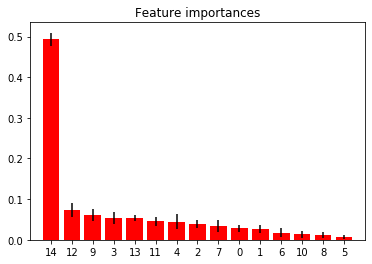

In [259]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range (train_X.shape[1]):
    featurelist = []
    featurelist.append(X.columns[indices[f]])
    print(f + 1,"\t", X.columns[indices[f]], importances[indices[f]])
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

The model itself is too biased for these feature importances to hold significance.

# Multiple Regression 

In [272]:
y=odft.outcomes
X=odft[odft.columns.difference(['total_deaths_per_million','total_deaths','total_cases_per_million','date',
                              'tests_units','continent','reproduction_rate','crude_mortality','location','outcomes'])] 

In [273]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [274]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(train_X)
train_X = imp.transform(train_X)

valimp = SimpleImputer(missing_values=np.nan, strategy='median')
valimp = valimp.fit(val_X)
val_X = valimp.transform(val_X)
##train_y2 = train_y.fillna(train_y.median())

In [275]:
model = sm.OLS(train_y, train_X).fit()

In [276]:
predictions = model.predict(train_X)

In [277]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               outcomes   R-squared (uncentered):                   0.626
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              2608.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        17:23:51   Log-Likelihood:                         -13539.
No. Observations:               23365   AIC:                                  2.711e+04
Df Residuals:                   23350   BIC:                                  2.723e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.252e-05   3.46e-05      0.361      0.718   -5.54e-05    8.04e-05
x2             0.0149      0.001     13.760      0.000       0.013       0.017
x3            -0.0037      0.000    -10.713      0.000      -0.004      -0.003
x4             0.0123      0.000     26.455      0.000       0.011       0.013
x5         -1.891e-06   2.24e-07     -8.454      0.000   -2.33e-06   -1.45e-06
x6             0.0028      0.000     12.729      0.000       0.002       0.003
x7            -0.0176      0.002    -10.026      0.000      -0.021      -0.014
x8             0.7375      0.078      9.484      0.000       0.585       0.890
x9             0.0005      0.001      0.656      0.512      -0.001       0.002
x10           -0.0050      0.000    -16.837      0.000      -0.006      -0.004
x11           -0.0079      0.001     -8.978      0.000      -0.010      -0.006
x12         1.143e-10    1.9e-11      6.009      0.000     7.7e-11    1.52e-10
x13        -8.499e-05   6.99e-06    -12.158      0.000   -9.87e-05   -7.13e-05
x14           -0.0008      0.000     -4.440      0.000      -0.001      -0.000
x15            0.0004    8.3e-06     43.453      0.000       0.000       0.000
==============================================================================
Omnibus:                   434313.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1818.479
Skew:                          -0.100   Prob(JB):                         0.00
Kurtosis:                       1.648   Cond. No.                     4.51e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [264]:
print(X.columns[8], X.columns[7], X.columns[2])

life_expectancy human_development_index extreme_poverty


life expectancy, human_development_index and extreme_poverty look like the strongest candidates for feature importance from the linear regression, however these results should be interpreted with caution.

# kNN
- using only most recent time data

In [183]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
#Most recent data
odfdt = odft.copy()
odfdt['date'] = pd.to_datetime(odfdt['date'])
cutoff_date = pd.Timestamp('2021-02-01 00:00:00');

#Shortened dataset to only the most recent date to remove all time-related values
odfdt = odfdt[odfdt.date == cutoff_date]

In [215]:
y=odfdt.outcomes
X=odfdt[odfdt.columns.difference(['total_deaths_per_million','total_cases_per_million','date',
                              'tests_units','continent','reproduction_rate','crude_mortality','location','outcomes'])] 

In [216]:
sc = StandardScaler()
X_train = sc.fit_transform(train_X)
X_test = sc.transform(val_X)

In [225]:
kNNmodel = KNeighborsClassifier(n_neighbors = 5)
kNNmodel.fit(X_train, train_y)

KNeighborsClassifier()

In [222]:
y_pred = kNNmodel.predict(X_test)

In [226]:
from sklearn.metrics import classification_report

In [227]:
cmatrix = confusion_matrix(val_y, y_pred)
cmatrix

array([[ 2,  4],
       [ 3, 14]], dtype=int64)

In [228]:
print(classification_report(val_y, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.78      0.82      0.80        17

    accuracy                           0.70        23
   macro avg       0.59      0.58      0.58        23
weighted avg       0.68      0.70      0.69        23



# kNN
- using processed dataset

In [237]:
y=odft.outcomes
X=odft[odft.columns.difference(['total_deaths_per_million','total_cases_per_million','date',
                              'tests_units','continent','reproduction_rate','crude_mortality','location','outcomes'])] 

In [238]:
sc = StandardScaler()
X_train = sc.fit_transform(train_X)
X_test = sc.transform(val_X)

In [241]:
kNNmodel = KNeighborsClassifier(n_neighbors = 50)
kNNmodel.fit(X_train, train_y)

KNeighborsClassifier(n_neighbors=50)

In [242]:
y_pred = kNNmodel.predict(X_test)

In [243]:
from sklearn.metrics import classification_report

In [244]:
cmatrix = confusion_matrix(val_y, y_pred)
cmatrix

array([[ 0,  6],
       [ 0, 17]], dtype=int64)

In [245]:
print(classification_report(val_y, y_pred))
#overfitting again

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.74      1.00      0.85        17

    accuracy                           0.74        23
   macro avg       0.37      0.50      0.42        23
weighted avg       0.55      0.74      0.63        23



C:\Users\Ramello\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramello\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramello\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
